# Exploratory Data Analysis on Movie Data

## Business Problem

Microsoft is looking to create a new movie studio that can distribute films to movie theaters. They are looking for tangible advice towards creating movies that can compete at the box office. Specifically, they would like to know 'what types of films are currently doing the best at the box office'. They have given me data on the film industry and tasked me with finding three actionable insights. 


## General Overview of the Industy

Before approcahing this problem, I wanted to familiarize myself as much as possible with the film industry. Three questions, I needed to understand in order to provide actionable recommendations were.

1) [How do film studios make money](https://www.investopedia.com/articles/investing/093015/how-exactly-do-movies-make-money.asp). (investopedia.com)

2) [What costs and revenue streams do film studios have](https://www.fticonsulting.com/emea/-/media/files/emea--files/insights/articles/2020/sep/economics-film-changing-dynamics-covid-19-world.pdf?rev=71d8d0ae3a2b413bb77950dd772bee74&hash=7B4F3893D68857623A232DCE9F062B1E). (fticonsulting.com)

3) [What are some trends in the movie industry that a new company can capitalize on](https://www.motionpictures.org/wp-content/uploads/2019/03/MPAA-THEME-Report-2018.pdf). (motionpictures.org)

One of the key takeaways from my preliminary research was that movie studios budgets are purposely misleading. The reported budget for movies is not reliable because it does not take into account marketing costs. Marketing and advertising costs for movies are oftentimes just as high as production budgets and that cost is not reported publicly.

This practice is so widespread that there is an entire wikipedia article on something called "[Hollywood Accounting](https://en.wikipedia.org/wiki/Hollywood_accounting)".  One of the most egregious examples of this is Star Wars Episode VI - [Return of the Jedi, despite making 450 million dollars in 1983](https://www.theatlantic.com/business/archive/2011/09/how-hollywood-accounting-can-make-a-450-million-movie-unprofitable/245134/) has yet to turn a profit according to LucasFilms. 

Another key insight from my research was the average movie released from 2016-2019 did not recover its costs after its theatrical release. Most films only begin making a profit after the "home release" period of it's development. This insight whilst not valuable to answering the business problem could be a source for further data analysis moving forward.

The final conclusion I gleaned from my research was a general trend towards foreign markets. Whilst the U.S. and Canada are still the largest markets for theatrical releases, other countries made up 71% of the global box office. There is also a growing trend where some American made films to make more internationally than domestically. This is a new trend and one that I think Microsoft should exploit.



## General Understanding Key Takeaways

1) Because the production cost is not reliable data uses gross revenue to identify which movies are doing best at the box office.

2) Test to see if foreign box office is connected to the total gross of the movie.

3) Use categorical data to identify some actionable insights Microsoft Film Studio can use.

## Data Understanding

In [2]:
# Import libraries and my data files

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
tmdb_df = pd.read_csv('zippeddata/tmdb.movies.csv')
movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv')
con = sqlite3.connect('zippeddata/im.db')

In [3]:
# Open The Movie Database File to see what information is available in it
tmdb_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


#### The Movie Database File appears to have information on the user reviews and some information on genres but would require information on the genre id codes

In [4]:
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


#### The Box Office Mojo has information on the domestic and foreign gross as long as the title. This will make it possible to combine the dataframes on title into one comprehensive data frame

In [5]:
#Check out the tables for the IMDb data

table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(table_name_query, con)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


#### Here is the ERD for the database

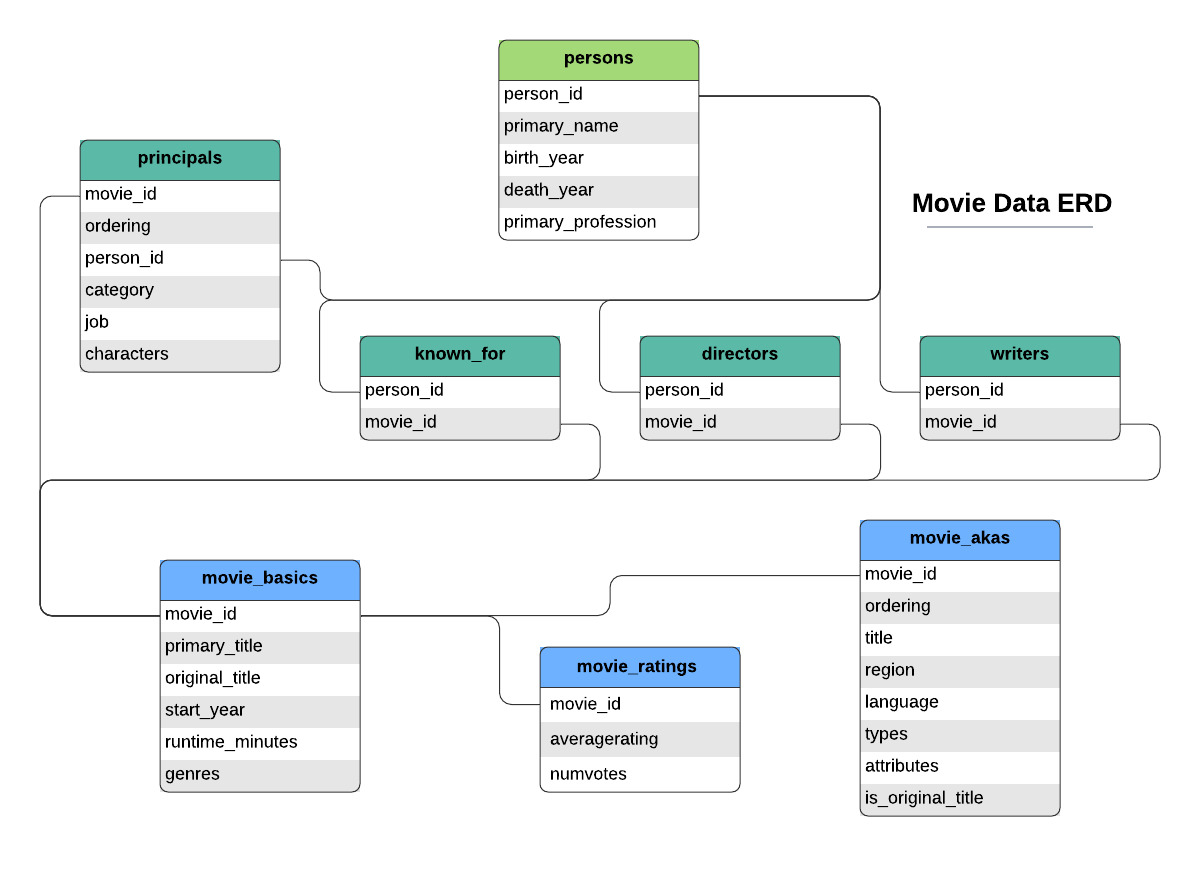

#### The IMDb data is a .df file so I will have to run some SQL queries to get the data I need. I'm most interested in grabbing categorical data so I'm going to grab the director data. I'm also going to grab the run time length, genres, and average rating. Although I already have information on genres and average rating, it may be useful to compare it if I have time. 

In [6]:
query_1 = '''
SELECT 
        primary_name as Director,
        primary_title as Movie_Name,
        runtime_minutes as Length,
        genres,
        averagerating as AVG_Rating
        
        
FROM directors as d 
	JOIN persons as p
		on p.person_id = d.person_id
			JOIN movie_basics as mb
				on d.movie_id = mb.movie_id
                    JOIN movie_ratings as mr
                        on mr.movie_id = mb.movie_id

'''

director_movie_genre_df = pd.read_sql(query_1, con)

director_movie_genre_df

,Director,Movie_Name,Length,genres,AVG_Rating
0,Tony Vitale,Life's a Beach,100.0,Comedy,3.9
1,Bill Haley,Steve Phoenix: The Untold Story,110.0,Drama,5.5
2,Jay Chandrasekhar,The Babymakers,95.0,Comedy,5.0
3,Jay Chandrasekhar,The Babymakers,95.0,Comedy,5.0
4,Albert Pyun,Bulletface,82.0,Thriller,5.8
...,...,...,...,...,...
181382,Anne Sundberg,Reversing Roe,99.0,Documentary,7.4
181383,Mike Rohl,The Princess Switch,101.0,Romance,6.0
181384,Mike Rohl,The Princess Switch,101.0,Romance,6.0
181385,Richard Squires,Doozy,70.0,"Animation,Comedy",6.7


#### Now that I've taken a quick look at my data, I want to key in on the movie gross data. Total box office will be the key metric I judge success on so I want to look at that first

In [7]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### There are a lot of null values in the foreign gross column. But I wanted to see if that was a result of some movies not being released internationally. There is significantly less null values for the domestic gross so I can use a cutoff point to see if those null values are because the movie was unlikely and could not be sold to an international distributor. 

In [8]:
# Use a loc statement to subset the dataframe to where domestic gross is greater than $10,000,000
movie_gross_df.loc[movie_gross_df['domestic_gross'] > 10000000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 3226
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1169 non-null   object 
 1   studio          1169 non-null   object 
 2   domestic_gross  1169 non-null   float64
 3   foreign_gross   1116 non-null   object 
 4   year            1169 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 54.8+ KB


In [9]:
# Use a loc statement to subset the dataframe to where domestic gross is greater than $100,000,000
movie_gross_df.loc[movie_gross_df['domestic_gross'] > 100000000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 3129
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           284 non-null    object 
 1   studio          284 non-null    object 
 2   domestic_gross  284 non-null    float64
 3   foreign_gross   284 non-null    object 
 4   year            284 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 13.3+ KB


#### When I look only at the movies that cross a threshold of domestic gross, most of the null values go away. This reinforces my idea that most of the movies missing a foreign gross value were probably not released internationally. Because I want to keep as much data as possible, I'm going to use 10,000,000 dollars as my cut-off threshold for my analysis and drop any columns that have a null value for foreign_gross.

In [10]:
# Create a new dataset that only has movies that grossed over $10,000,000 domestically
movie_gross_over_ten_milly_df = movie_gross_df.loc[movie_gross_df['domestic_gross'] > 10000000]

In [11]:
# Drop null values
movie_gross_over_ten_milly_df = movie_gross_over_ten_milly_df.dropna(axis = 0, subset = ['foreign_gross'])
movie_gross_over_ten_milly_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3203,If Beale Street Could Talk,Annapurna,14900000.0,5700000,2018
3207,Hell Fest,LGF,11100000.0,7100000,2018
3208,Chappaquiddick,ENTMP,17400000.0,591000,2018
3216,Upgrade,BH Tilt,12000000.0,2400000,2018


#### Unfortunately some of the data for foreign gross is not an intenger or float so I need to clean it up by eliminating some of the problematic characters.

In [12]:
# Remove the commas from the dataset and then set it as float and then an intenger
movie_gross_over_ten_milly_df["foreign_gross"] = movie_gross_over_ten_milly_df["foreign_gross"].str.replace(",","")
movie_gross_over_ten_milly_df['foreign_gross'] = movie_gross_over_ten_milly_df['foreign_gross'].astype(float).astype(int)

In [13]:
movie_gross_over_ten_milly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 0 to 3219
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1116 non-null   object 
 1   studio          1116 non-null   object 
 2   domestic_gross  1116 non-null   float64
 3   foreign_gross   1116 non-null   int32  
 4   year            1116 non-null   int64  
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 48.0+ KB


#### Now that foreign gross is an intenger type, I can create new columns by doing some math between domestic gross and foreign gross

In [14]:
# Create a total gross column which combines domestic and foreign gross
movie_gross_over_ten_milly_df['total_gross'] = movie_gross_over_ten_milly_df['domestic_gross'] + movie_gross_over_ten_milly_df['foreign_gross']


# Create a new column that shows what percent domestic gross made up total gross 

movie_gross_over_ten_milly_df['domestic_gross_percentage'] = (movie_gross_over_ten_milly_df['domestic_gross'] 
                                                              / movie_gross_over_ten_milly_df['total_gross']
                                                             ) * 100
movie_gross_over_ten_milly_df

,title,studio,domestic_gross,foreign_gross,year,total_gross,domestic_gross_percentage
0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09,38.894096
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09,32.588981
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08,30.823701
3,Inception,WB,292600000.0,535700000,2010,8.283000e+08,35.325365
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08,31.716715
...,...,...,...,...,...,...,...
3203,If Beale Street Could Talk,Annapurna,14900000.0,5700000,2018,2.060000e+07,72.330097
3207,Hell Fest,LGF,11100000.0,7100000,2018,1.820000e+07,60.989011
3208,Chappaquiddick,ENTMP,17400000.0,591000,2018,1.799100e+07,96.715024
3216,Upgrade,BH Tilt,12000000.0,2400000,2018,1.440000e+07,83.333333


### Now that I have some numerical data on domestic gross percentage and total gross I what to put that on a graph to see if I can glean anything from it

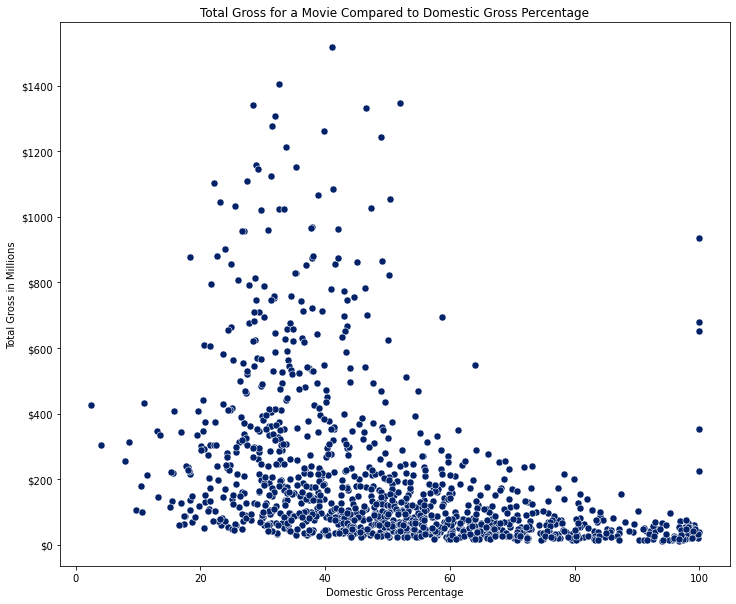

In [15]:
# Create a new column that is gross in millions so graphs are a bit easier to understand
movie_gross_over_ten_milly_df['gross_in_millions'] = movie_gross_over_ten_milly_df['total_gross'] / 1000000

plt.figure(figsize=(12, 10))
dg_percentage_scatter = sns.scatterplot(x ='domestic_gross_percentage', y = 'gross_in_millions', 
                                        s = 50, color = '#012169', data = movie_gross_over_ten_milly_df)

dg_percentage_scatter.set(xlabel ="Domestic Gross Percentage", 
                       ylabel = "Total Gross in Millions",
                       title = 'Total Gross for a Movie Compared to Domestic Gross Percentage',)

dg_percentage_scatter.yaxis.set_major_formatter('${x:1.0f}')

### It's tough to glean anything from this graph by itself, but I can create a new subset to limit the data points. Because Microsoft is primarily interested in standing out in the box office. I'm going to create a "blockbuster" dataset that consists only of movies that made more than 100 Million Dollars domestically.

In [16]:
blockbuster_movie_gross_df = movie_gross_over_ten_milly_df.loc[movie_gross_df['domestic_gross'] > 100000000]
blockbuster_movie_gross_df


,title,studio,domestic_gross,foreign_gross,year,total_gross,domestic_gross_percentage,gross_in_millions
0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09,38.894096,1067.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09,32.588981,1025.5
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08,30.823701,960.3
3,Inception,WB,292600000.0,535700000,2010,8.283000e+08,35.325365,828.3
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08,31.716715,752.6
...,...,...,...,...,...,...,...,...
3116,Crazy Rich Asians,WB,174500000.0,64000000,2018,2.385000e+08,73.165618,238.5
3119,Creed II,MGM,115700000.0,98300000,2018,2.140000e+08,54.065421,214.0
3121,The Equalizer 2,Sony,102100000.0,88300000,2018,1.904000e+08,53.623950,190.4
3123,The Mule,WB,103800000.0,68700000,2018,1.725000e+08,60.173913,172.5


#### Let's plot this data the same way and see if a trend emerges

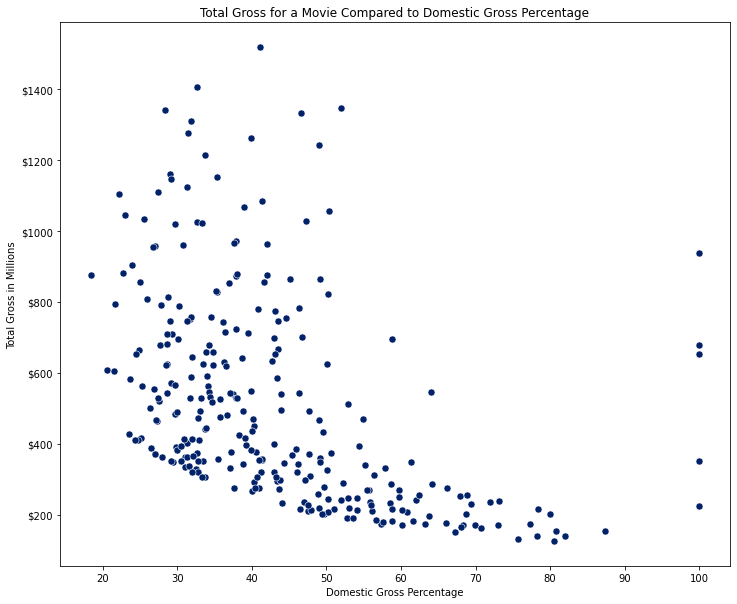

In [17]:
plt.figure(figsize=(12, 10))
dg_percentage_scatter = sns.scatterplot(x ='domestic_gross_percentage', y = 'gross_in_millions', s = 50, 
                                        color = '#012169', data = blockbuster_movie_gross_df)

dg_percentage_scatter.set(xlabel ="Domestic Gross Percentage", 
                       ylabel = "Total Gross in Millions",
                       title = 'Total Gross for a Movie Compared to Domestic Gross Percentage',)

dg_percentage_scatter.yaxis.set_major_formatter('${x:1.0f}')

### This graph shows a much clearer trend, but it looks like there are some outliers where domestic gross percentage is higher. I'm going to clean those up and add a trend line to the graph

In [18]:
blockbuster_movie_gross_df.sort_values('domestic_gross_percentage', ascending = False).head(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross,domestic_gross_percentage,gross_in_millions
1872,Star Wars: The Force Awakens,BV,936700000.0,1131,2015,936701131.0,99.999879,936.701131
1873,Jurassic World,Uni.,652300000.0,1019,2015,652301019.0,99.999844,652.301019
3079,Avengers: Infinity War,BV,678800000.0,1369,2018,678801369.0,99.999798,678.801369
1874,Furious 7,Uni.,353000000.0,1163,2015,353001163.0,99.999671,353.001163
2760,The Fate of the Furious,Uni.,226000000.0,1010,2017,226001010.0,99.999553,226.001010
1527,Ride Along,Uni.,134900000.0,19500000,2014,154400000.0,87.370466,154.400000
2819,Girls Trip,Uni.,115200000.0,25400000,2017,140600000.0,81.934566,140.600000
1176,Lone Survivor,Uni.,125100000.0,29700000,2013,154800000.0,80.813953,154.800000
1185,This is the End,Sony,101500000.0,24600000,2013,126100000.0,80.491673,126.100000
1910,Straight Outta Compton,Uni.,161200000.0,40400000,2015,201600000.0,79.960317,201.600000


#### It looks like when the data was converted, movies that grossed over a billion dollars in international markets were incorrectly accounted for. I can quickly fix those numbers using a lambda function

In [19]:
#Fix our first modified dataframe
movie_gross_over_ten_milly_df['foreign_gross'] = movie_gross_over_ten_milly_df['foreign_gross'].apply(lambda x: x * 1000000 if x < 2000 else x)
movie_gross_over_ten_milly_df.sort_values('domestic_gross_percentage', ascending = False).head(10)

#Fix our second modified dataframe
blockbuster_movie_gross_df['foreign_gross'] = blockbuster_movie_gross_df['foreign_gross'].apply(lambda x: x * 1000000 if x < 2000 else x)
blockbuster_movie_gross_df.sort_values('domestic_gross_percentage', ascending = False).head(10)

# Reset the Total Gross fro both dataframes

movie_gross_over_ten_milly_df['total_gross'] = movie_gross_over_ten_milly_df['domestic_gross'] + movie_gross_over_ten_milly_df['foreign_gross']

blockbuster_movie_gross_df['total_gross'] = blockbuster_movie_gross_df['domestic_gross'] + blockbuster_movie_gross_df['foreign_gross']

# Reset the domestic gross percentage column for both dataframes
movie_gross_over_ten_milly_df['domestic_gross_percentage'] = (movie_gross_over_ten_milly_df['domestic_gross'] 
                                                              / movie_gross_over_ten_milly_df['total_gross']
                                                             ) * 100
blockbuster_movie_gross_df['domestic_gross_percentage'] = (blockbuster_movie_gross_df['domestic_gross'] 
                                                              / blockbuster_movie_gross_df['total_gross']
                                                             ) * 100

<ipython-input-19-306458a7a27a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blockbuster_movie_gross_df['foreign_gross'] = blockbuster_movie_gross_df['foreign_gross'].apply(lambda x: x * 1000000 if x < 2000 else x)
<ipython-input-19-306458a7a27a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blockbuster_movie_gross_df['total_gross'] = blockbuster_movie_gross_df['domestic_gross'] + blockbuster_movie_gross_df['foreign_gross']
<ipython-input-19-306458a7a27a>:19: SettingWithCopyWarning: 
A value is tryi

In [20]:
blockbuster_movie_gross_df.sort_values('domestic_gross_percentage', ascending = False).head(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross,domestic_gross_percentage,gross_in_millions
1527,Ride Along,Uni.,134900000.0,19500000,2014,154400000.0,87.370466,154.4
2819,Girls Trip,Uni.,115200000.0,25400000,2017,140600000.0,81.934566,140.6
1176,Lone Survivor,Uni.,125100000.0,29700000,2013,154800000.0,80.813953,154.8
1185,This is the End,Sony,101500000.0,24600000,2013,126100000.0,80.491673,126.1
1910,Straight Outta Compton,Uni.,161200000.0,40400000,2015,201600000.0,79.960317,201.6
355,The Help,BV,169700000.0,46900000,2011,216600000.0,78.347184,216.6
1921,Trainwreck,Uni.,110200000.0,30600000,2015,140800000.0,78.267045,140.8
1172,Identity Thief,Uni.,134500000.0,39500000,2013,174000000.0,77.298851,174.0
3129,A Wrinkle in Time,BV,100500000.0,32200000,2018,132700000.0,75.734740,132.7
3116,Crazy Rich Asians,WB,174500000.0,64000000,2018,238500000.0,73.165618,238.5


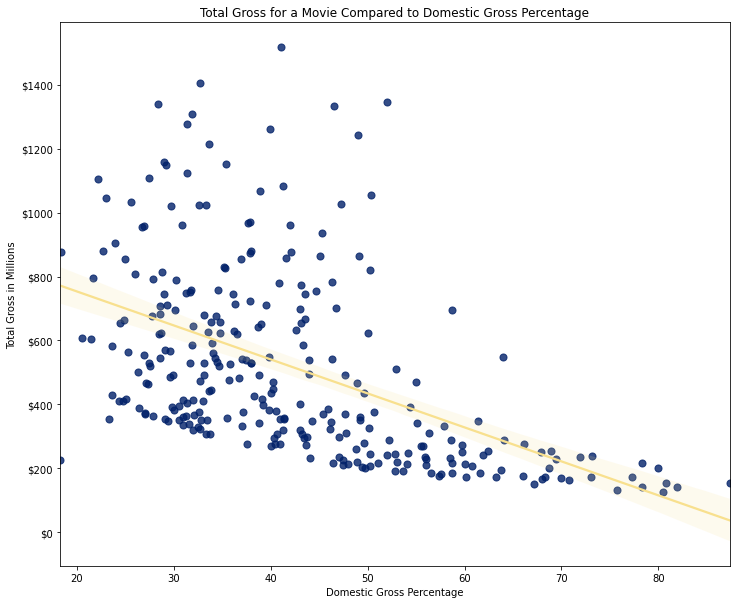

In [21]:
plt.figure(figsize=(12, 10))
dg_percentage_plot = sns.regplot(x ='domestic_gross_percentage', y = 'gross_in_millions', 
                                 fit_reg=True,
                                 data = blockbuster_movie_gross_df,
                                 scatter_kws={'s':50, "color": "#012169"},
#                                  scatter_kws={"color": "#012169"}, 
                                 line_kws={"color": "#F8E08E"}
                                 
                                )
dg_percentage_plot.set(xlabel ="Domestic Gross Percentage", 
                       ylabel = "Total Gross in Millions",
                       title = 'Total Gross for a Movie Compared to Domestic Gross Percentage',)

dg_percentage_plot.yaxis.set_major_formatter('${x:1.0f}')

### This graph suggests there is a a negative correlation between total gross and the domestic gross percentage. Movies that make more money are less reliant on the domestic box office. 

### I also want to explore the review data from The Movie DataBase to see if I can glean any insights from that. In order to do that I will have to merge the two dataframes. 

In [22]:
movie_gross_and_rating_df = tmdb_df[['title', 'vote_average', 'popularity', 'release_date']].merge(movie_gross_over_ten_milly_df, 
                                        left_on='title',
                                        right_on='title',
                                           how='inner')
movie_gross_and_rating_df

,title,vote_average,popularity,release_date,studio,domestic_gross,foreign_gross,year,total_gross,domestic_gross_percentage,gross_in_millions
0,How to Train Your Dragon,7.7,28.734,2010-03-26,P/DW,217600000.0,277300000,2010,4.949000e+08,43.968478,494.900
1,Iron Man 2,6.8,28.515,2010-05-07,Par.,312400000.0,311500000,2010,6.239000e+08,50.072127,623.900
2,Inception,8.3,27.920,2010-07-16,WB,292600000.0,535700000,2010,8.283000e+08,35.325365,828.300
3,Toy Story 3,7.7,24.445,2010-06-17,BV,415000000.0,652000000,2010,1.067000e+09,38.894096,1067.000
4,Despicable Me,7.2,23.673,2010-07-09,Uni.,251500000.0,291600000,2010,5.431000e+08,46.308231,543.100
...,...,...,...,...,...,...,...,...,...,...,...
1064,The 15:17 to Paris,5.3,11.576,2018-02-09,WB,36300000.0,20800000,2018,5.710000e+07,63.572680,57.100
1065,Uncle Drew,6.5,10.836,2018-06-29,LG/S,42500000.0,4200000,2018,4.670000e+07,91.006424,46.700
1066,Chappaquiddick,6.0,10.737,2018-04-06,ENTMP,17400000.0,591000,2018,1.799100e+07,96.715024,17.991
1067,Proud Mary,5.5,9.371,2018-01-12,SGem,20900000.0,876000,2018,2.177600e+07,95.977223,21.776


#### The merge appears to be sucessful as we only lost ~4% of the columns. It would be possible to further optimize this merge at a later date but I am confident it 'mostly worked'™ . 

#### Let's plot a graph to see if we can glean anything

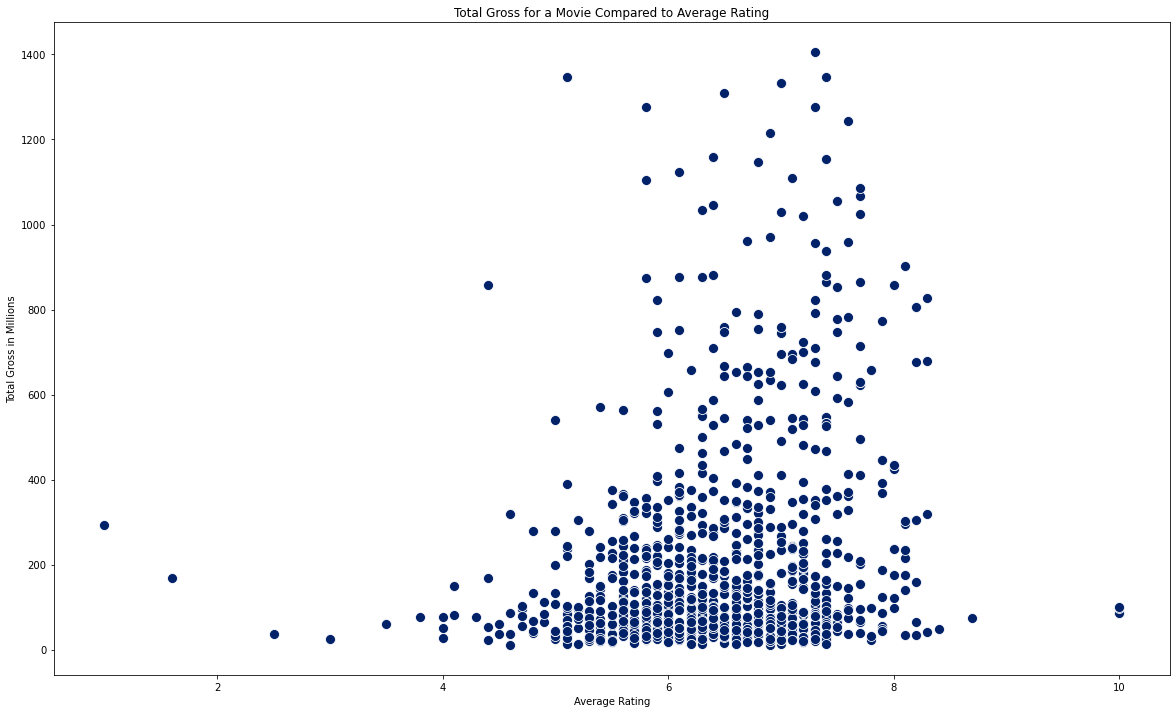

In [23]:
plt.figure(figsize=(20, 12))
vote_average_vs_gross_scatterplot = sns.scatterplot( x = 'vote_average', y = 'gross_in_millions', color = '#012169', data = movie_gross_and_rating_df, s= 100)

vote_average_vs_gross_scatterplot.set(xlabel ="Average Rating", 
                       ylabel = "Total Gross in Millions",
                       title = 'Total Gross for a Movie Compared to Average Rating',
                                     )

dg_percentage_plot.yaxis.set_major_formatter('${x:1.0f}')

##### That plot looks like the first day of my statistics course!

### It looks like a continuous uniform distribution. If I were to plot data with no correlation I would expect a graph like this. Though I can't necessarilyhelp build an actionable insight for Microsoft, but I can tell them that fan ratings do not appear to be correlated with box office gross. 


### I do want to look at genres to see which genres perform best at the box office and see how those genres perform in international markets. In order to do that I'm going to add Directors and Genres to the dataframe with movies that exceeded 10 Million Dollars.

In [75]:
movie_gross_and_director = director_movie_genre_df.merge(movie_gross_over_ten_milly_df, 
                                        left_on='Movie_Name',
                                        right_on='title',
                                           how='inner')

movie_gross_and_director.head(5)

,Director,Movie_Name,Length,genres,AVG_Rating,title,studio,domestic_gross,foreign_gross,year,total_gross,domestic_gross_percentage,gross_in_millions
0,Roger Michell,Morning Glory,107.0,"Comedy,Drama,Romance",6.5,Morning Glory,Par.,31000000.0,29000000,2010,60000000.0,51.666667,60.0
1,Adam Shankman,Rock of Ages,123.0,"Comedy,Drama,Musical",5.9,Rock of Ages,WB (NL),38500000.0,20900000,2012,59400000.0,64.814815,59.4
2,Adam Shankman,Rock of Ages,123.0,"Comedy,Drama,Musical",5.9,Rock of Ages,WB (NL),38500000.0,20900000,2012,59400000.0,64.814815,59.4
3,Adam Shankman,Rock of Ages,123.0,"Comedy,Drama,Musical",5.9,Rock of Ages,WB (NL),38500000.0,20900000,2012,59400000.0,64.814815,59.4
4,Tim Hill,Hop,95.0,"Adventure,Animation,Comedy",5.4,Hop,Uni.,108100000.0,75900000,2011,184000000.0,58.750000,184.0


In [76]:
movie_gross_and_director.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403 entries, 0 to 3402
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Director                   3403 non-null   object 
 1   Movie_Name                 3403 non-null   object 
 2   Length                     3381 non-null   float64
 3   genres                     3397 non-null   object 
 4   AVG_Rating                 3403 non-null   float64
 5   title                      3403 non-null   object 
 6   studio                     3403 non-null   object 
 7   domestic_gross             3403 non-null   float64
 8   foreign_gross              3403 non-null   int64  
 9   year                       3403 non-null   int64  
 10  total_gross                3403 non-null   float64
 11  domestic_gross_percentage  3403 non-null   float64
 12  gross_in_millions          3403 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage:

### This dataframe returned more rows than movies we were looking at but we can tell from the preview there are some duplicates in there. So dropping the duplicates will most likely return something we can work with. 

In [77]:
movie_gross_and_director.drop_duplicates(subset = "Movie_Name", inplace=True)
movie_gross_and_director

,Director,Movie_Name,Length,genres,AVG_Rating,title,studio,domestic_gross,foreign_gross,year,total_gross,domestic_gross_percentage,gross_in_millions
0,Roger Michell,Morning Glory,107.0,"Comedy,Drama,Romance",6.5,Morning Glory,Par.,31000000.0,29000000,2010,60000000.0,51.666667,60.000
1,Adam Shankman,Rock of Ages,123.0,"Comedy,Drama,Musical",5.9,Rock of Ages,WB (NL),38500000.0,20900000,2012,59400000.0,64.814815,59.400
4,Tim Hill,Hop,95.0,"Adventure,Animation,Comedy",5.4,Hop,Uni.,108100000.0,75900000,2011,184000000.0,58.750000,184.000
7,Darren Lynn Bousman,Mother's Day,112.0,"Drama,Horror,Thriller",6.3,Mother's Day,ORF,32500000.0,15900000,2016,48400000.0,67.148760,48.400
15,Greg Strause,Skyline,92.0,"Action,Sci-Fi,Thriller",4.4,Skyline,Uni.,21400000.0,45400000,2010,66800000.0,32.035928,66.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3391,Frank Coraci,Here Comes the Boom,105.0,"Action,Comedy,Sport",6.4,Here Comes the Boom,Sony,45300000.0,27800000,2012,73100000.0,61.969904,73.100
3394,Anne Fletcher,The Guilt Trip,95.0,"Comedy,Drama",5.8,The Guilt Trip,Par.,37100000.0,4700000,2012,41800000.0,88.755981,41.800
3395,Scott Derrickson,Sinister,110.0,"Horror,Mystery,Thriller",6.8,Sinister,LG/S,48100000.0,29600000,2012,77700000.0,61.904762,77.700
3397,Steve Pink,Hot Tub Time Machine 2,93.0,"Comedy,Mystery,Sci-Fi",5.1,Hot Tub Time Machine 2,Par.,12300000.0,767000,2015,13067000.0,94.130252,13.067


#### This looks much better and even though we lost some of our results, we can still glean some information from this new dataframe. If I had more time I could further refine the join but it 'mostly worked'™.

### I do want to seperate the genre category so the dataframe has a seperate column for each unique genre. 

In [78]:
#Create a new dataframe that keeps the same index but splits the genre row into three distinct rows
genres_df = movie_gross_and_director['genres'].str.split(',', expand = True)
genres_df.columns =['Genre1', 'Genre2', 'Genre3']
genres_df

,Genre1,Genre2,Genre3
0,Comedy,Drama,Romance
1,Comedy,Drama,Musical
4,Adventure,Animation,Comedy
7,Drama,Horror,Thriller
15,Action,Sci-Fi,Thriller
...,...,...,...
3391,Action,Comedy,Sport
3394,Comedy,Drama,None
3395,Horror,Mystery,Thriller
3397,Comedy,Mystery,Sci-Fi


#### I can now merge the two dataframes together

In [79]:
movie_gross_and_director = movie_gross_and_director.merge(genres_df, right_index = True, left_index = True)
movie_gross_and_director

,Director,Movie_Name,Length,genres,AVG_Rating,title,studio,domestic_gross,foreign_gross,year,total_gross,domestic_gross_percentage,gross_in_millions,Genre1,Genre2,Genre3
0,Roger Michell,Morning Glory,107.0,"Comedy,Drama,Romance",6.5,Morning Glory,Par.,31000000.0,29000000,2010,60000000.0,51.666667,60.000,Comedy,Drama,Romance
1,Adam Shankman,Rock of Ages,123.0,"Comedy,Drama,Musical",5.9,Rock of Ages,WB (NL),38500000.0,20900000,2012,59400000.0,64.814815,59.400,Comedy,Drama,Musical
4,Tim Hill,Hop,95.0,"Adventure,Animation,Comedy",5.4,Hop,Uni.,108100000.0,75900000,2011,184000000.0,58.750000,184.000,Adventure,Animation,Comedy
7,Darren Lynn Bousman,Mother's Day,112.0,"Drama,Horror,Thriller",6.3,Mother's Day,ORF,32500000.0,15900000,2016,48400000.0,67.148760,48.400,Drama,Horror,Thriller
15,Greg Strause,Skyline,92.0,"Action,Sci-Fi,Thriller",4.4,Skyline,Uni.,21400000.0,45400000,2010,66800000.0,32.035928,66.800,Action,Sci-Fi,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3391,Frank Coraci,Here Comes the Boom,105.0,"Action,Comedy,Sport",6.4,Here Comes the Boom,Sony,45300000.0,27800000,2012,73100000.0,61.969904,73.100,Action,Comedy,Sport
3394,Anne Fletcher,The Guilt Trip,95.0,"Comedy,Drama",5.8,The Guilt Trip,Par.,37100000.0,4700000,2012,41800000.0,88.755981,41.800,Comedy,Drama,None
3395,Scott Derrickson,Sinister,110.0,"Horror,Mystery,Thriller",6.8,Sinister,LG/S,48100000.0,29600000,2012,77700000.0,61.904762,77.700,Horror,Mystery,Thriller
3397,Steve Pink,Hot Tub Time Machine 2,93.0,"Comedy,Mystery,Sci-Fi",5.1,Hot Tub Time Machine 2,Par.,12300000.0,767000,2015,13067000.0,94.130252,13.067,Comedy,Mystery,Sci-Fi


#### I want to find a way to get the average movie gross for each genre. The first step is to get a list of genres. 

In [80]:
# Create A New Dataframe where the genres are the columns
list_of_genres_df = genres_df[['Genre1', 'Genre2', 'Genre3']].apply(pd.Series.value_counts)
list_of_genres_df = list_of_genres_df.transpose()
list_of_genres_df

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
Genre1,308.0,129.0,7.0,67.0,178.0,33.0,14.0,126.0,NaN,2.0,...,46.0,NaN,NaN,2.0,1.0,1.0,NaN,2.0,NaN,NaN
Genre2,NaN,156.0,69.0,8.0,83.0,65.0,3.0,185.0,27.0,29.0,...,25.0,14.0,1.0,52.0,56.0,15.0,6.0,29.0,1.0,2.0
Genre3,NaN,NaN,12.0,2.0,85.0,30.0,NaN,79.0,36.0,53.0,...,19.0,11.0,4.0,21.0,54.0,74.0,9.0,124.0,2.0,2.0


In [81]:
#Convert the Column Labels into a list
list_of_genres = list(list_of_genres_df.columns)
list_of_genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

#### First I am going to go through the dataframe and assert whether that movie contains the genres. I used the boolean True or False for the assertion. 

In [82]:
for genre in list_of_genres:
    movie_gross_and_director[genre] = np.where((movie_gross_and_director['Genre1']  == genre) | 
                                              (movie_gross_and_director['Genre2']  == genre) |
                                              (movie_gross_and_director['Genre3']  == genre),
                                              True,
                                              False)

#### Now that I have a list of all the genres and have identified which movies contain which genres, I can create a loop that goest through the dataframe and gets the average gross and domestic box office percentage for those genres.

In [83]:
#Create a new empty list to put the average gross values for each genre into
total_gross_genre = []
for genre in list_of_genres:
        #Add the mean value for all the columsn
        total_gross_genre.append(movie_gross_and_director.loc[movie_gross_and_director[genre] == True]['total_gross'].mean())

#Create a new empty list to put the average gross values for each genre into
total_gross_genre

[318129301.9318182,
 394275140.32631576,
 387769318.14772725,
 129916064.92207792,
 184280297.37861273,
 138546617.1796875,
 107740294.05882353,
 127946916.13846155,
 197303761.9047619,
 277673285.70238096,
 137078249.9642857,
 131115088.8888889,
 132049440.0,
 208200000.0,
 125481520.0,
 105797566.64864865,
 434950744.43333334,
 157189993.33333334,
 188674780.63870966,
 123066666.66666667,
 256325000.0]

In [84]:
#Create a new empty list to put the domestic gross percentage values for each genre into

domestic_gross_percentage_genre = []
for genre in list_of_genres:
        domestic_gross_percentage_genre.append(movie_gross_and_director.loc[movie_gross_and_director[genre] == True]['domestic_gross_percentage'].mean())

domestic_gross_percentage_genre

[42.38097838612483,
 39.255730100079205,
 39.41045870997703,
 56.20198961639074,
 53.92797872090043,
 54.698373441845774,
 64.95473576658722,
 54.521062353888446,
 51.53358760392938,
 41.14422676675871,
 53.04935267573994,
 51.006193590898256,
 53.14174141717532,
 48.222498093369765,
 48.49637392226229,
 54.111280628072954,
 42.619232348624884,
 72.93264852727965,
 47.275360425770096,
 47.54061374917885,
 47.46483307992577]

#### Now that I have three seperate lists, I can create a new dataframe object with those three values.

In [85]:
zipped = list(zip(list_of_genres, total_gross_genre, domestic_gross_percentage_genre))
genre_data_df = pd.DataFrame(zipped, columns=['Genre', 'Total_Gross_Genre', 'Domestic Gross Percentage'])
genre_data_df
# Sort the dataframe for easier analysis
genre_data_df = genre_data_df.sort_values('Total_Gross_Genre', ascending=False)
# Create a new Column for Total_Gross in Millions
genre_data_df['Total_Gross_In_Mllions'] = genre_data_df['Total_Gross_Genre']/ 1000000
genre_data_df

,Genre,Total_Gross_Genre,Domestic Gross Percentage,Total_Gross_In_Mllions
16,Sci-Fi,4.349507e+08,42.619232,434.950744
1,Adventure,3.942751e+08,39.255730,394.275140
2,Animation,3.877693e+08,39.410459,387.769318
0,Action,3.181293e+08,42.380978,318.129302
9,Fantasy,2.776733e+08,41.144227,277.673286
20,Western,2.563250e+08,47.464833,256.325000
13,Musical,2.082000e+08,48.222498,208.200000
8,Family,1.973038e+08,51.533588,197.303762
18,Thriller,1.886748e+08,47.275360,188.674781
4,Comedy,1.842803e+08,53.927979,184.280297


### Now I want to visualize this data. I'm going to create two horizontal bar charts with the same y axis (genre).

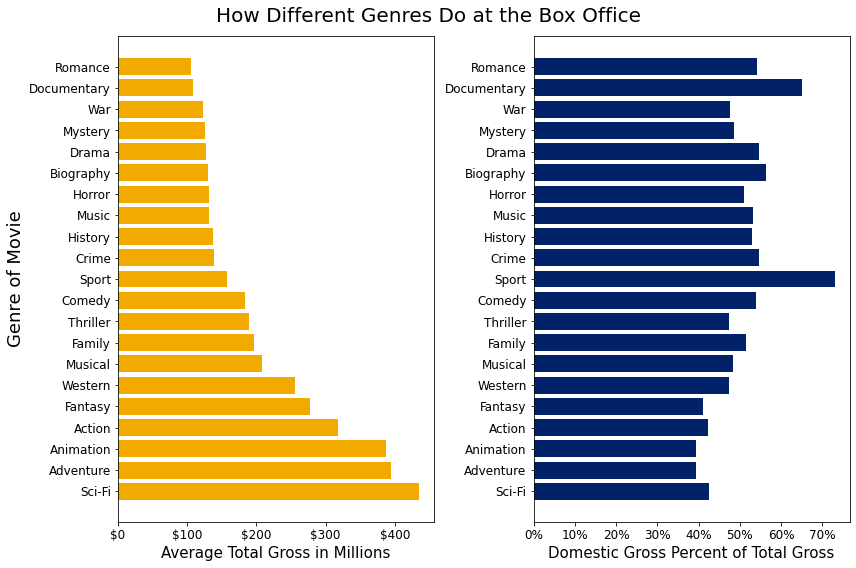

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('How Different Genres Do at the Box Office', fontsize = 20)
ax1.barh(genre_data_df['Genre'], genre_data_df['Total_Gross_In_Mllions'], color = '#f2a900')
ax2.barh(genre_data_df['Genre'], genre_data_df['Domestic Gross Percentage'], color = '#012169')

# Below code does very specefic formatting
ax1.set_xlabel('Average Total Gross in Millions', fontsize = 15)
ax2.set_xlabel('Domestic Gross Percent of Total Gross', fontsize = 15)
ax1.set_ylabel('Genre of Movie', fontsize = 18)
ax1.xaxis.set_major_formatter('${x:1.0f}')
ax2.xaxis.set_major_formatter('{x:1.0f}%')
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

plt.tight_layout()


### It appears that the genres with the most total gross are also less reliant on domestic revenue. This further supports my belief that making movies that can are just as appealing to an international audience is a better strategy. It also allows me to give some actionable insights to Microsoft Film Studio about what type of movies they should make

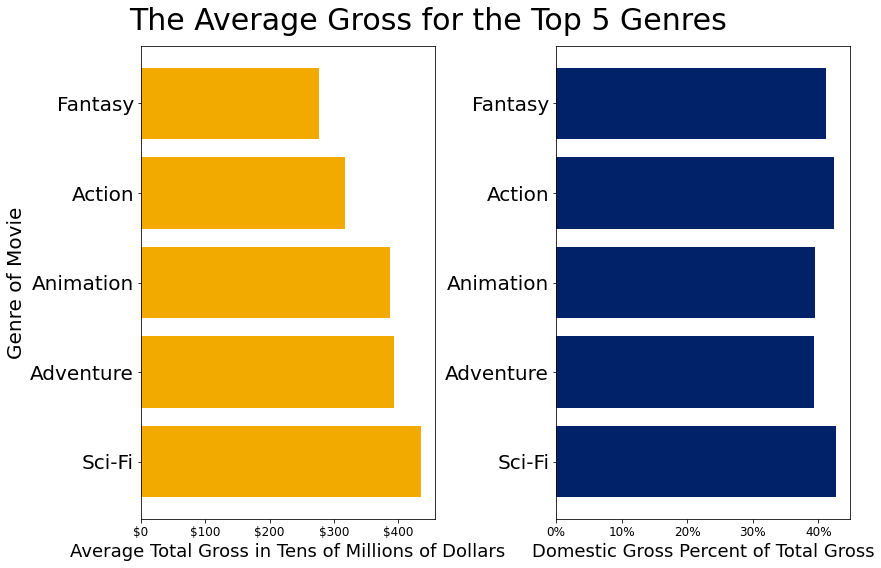

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('The Average Gross for the Top 5 Genres', fontsize = 30)
ax1.barh(genre_data_df['Genre'].head(5), genre_data_df['Total_Gross_In_Mllions'].head(5), color = '#f2a900')
ax2.barh(genre_data_df['Genre'].head(5), genre_data_df['Domestic Gross Percentage'].head(5), color = '#012169')


# Below code does very specefic formatting
ax1.set_xlabel('Average Total Gross in Tens of Millions of Dollars', fontsize = 18)
ax2.set_xlabel('Domestic Gross Percent of Total Gross', fontsize = 18)
ax1.set_ylabel('Genre of Movie', fontsize = 20)
ax1.xaxis.set_major_formatter('${x:1.0f}')
ax2.xaxis.set_major_formatter('{x:1.0f}%')
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=20)
plt.tight_layout()


### ***Sci-Fi, Adventure, Animation, Action, and Fantasy*** movies make more money than other movies and also have international appeal. This is an actionable insight I can give to Microsoft Film Studios. 

## I also want to recommend some directors to recommend hiring. I believe that hiring high-profile directors with a history of making 'Blockbuster" movies will benefit Microsoft. In order to find the best directors for Microsoft to hire I'm going to segment my data again to only include films that grossed over 100 Million Dollars and find the directors who most appeal to international markets. 

In [37]:
# Create a new dataframe using our combined 
# Movie Gross, Director, and Genre DF where domestic gross is greater than $100 Dollars
BB_gross_director_df = movie_gross_and_director.loc[movie_gross_and_director['domestic_gross'] > 100000000]

In [38]:
# Sort the new dataframe using a groupby method so every movie a director made during this time period is accounted for
director_percentage_sorted_df = BB_gross_director_df.groupby('Director').mean().reset_index().sort_values('domestic_gross_percentage', ascending = True)
# Grab only the top 10 directors by International Gross Percentage
ten_lowest_dom_percentage_directors = director_percentage_sorted_df.head(10)
#Sort the dataframe by total gross so the graph is prettier
ten_lowest_dom_percentage_directors = ten_lowest_dom_percentage_directors.sort_values('total_gross')
ten_lowest_dom_percentage_directors

,Director,Length,AVG_Rating,domestic_gross,foreign_gross,year,total_gross,domestic_gross_percentage,gross_in_millions,Genre1,Genre2,Genre3
65,Guillermo del Toro,131.000000,6.9,1.018000e+08,3.092000e+08,2013.0,4.110000e+08,24.768856,411.000000,False,False,False
107,Michael Apted,113.000000,6.3,1.044000e+08,3.113000e+08,2010.0,4.157000e+08,25.114265,415.700000,False,False,False
132,Raja Gosnell,103.000000,5.5,1.426000e+08,4.211000e+08,2011.0,5.637000e+08,25.297144,563.700000,False,False,False
9,Ang Lee,127.000000,7.9,1.250000e+08,4.840000e+08,2012.0,6.090000e+08,20.525452,609.000000,False,False,False
78,Jennifer Yuh Nelson,90.000000,7.2,1.652000e+08,5.004000e+08,2011.0,6.656000e+08,24.819712,665.600000,False,False,False
79,Joachim Rønning,129.000000,6.6,1.726000e+08,6.223000e+08,2017.0,7.949000e+08,21.713423,794.900000,False,False,False
113,Mike Thurmeier,88.000000,6.6,1.613000e+08,7.159000e+08,2012.0,8.772000e+08,18.388053,877.200000,False,False,False
108,Michael Bay,157.666667,5.7,2.426667e+08,7.017667e+08,2014.0,9.444333e+08,25.029681,944.433333,False,False,False
146,Sam Mendes,145.500000,7.3,2.522500e+08,7.424000e+08,2013.5,9.946500e+08,25.089309,994.650000,False,False,False
94,Kyle Balda,89.000000,6.3,2.646000e+08,7.702000e+08,2017.0,1.034800e+09,25.570158,1034.800000,False,False,False


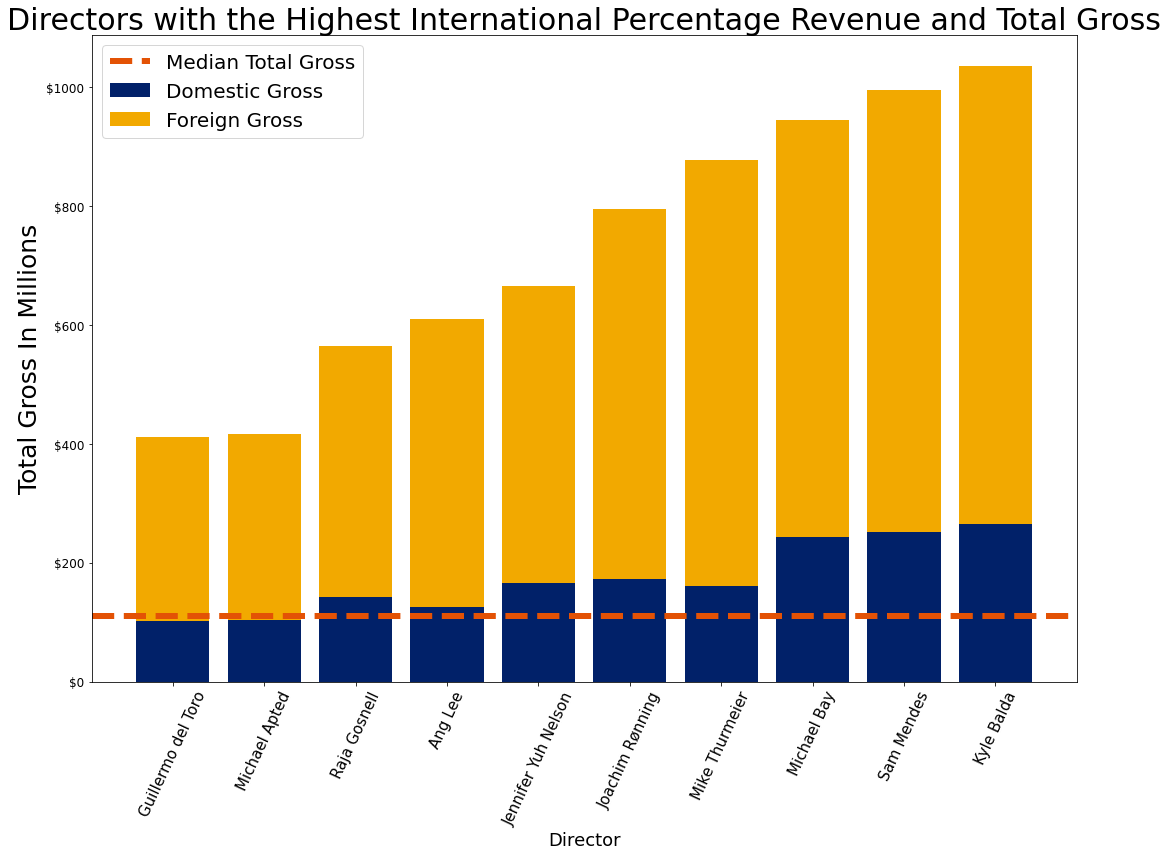

In [49]:
#Find the median gross for all movies to see how much these directors exceed the average
median_movie_gross = movie_gross_and_director['total_gross'].median()
#Create new columns to make the graph prettier
ten_lowest_dom_percentage_directors['Domestic_Gross_In_Millions'] = ten_lowest_dom_percentage_directors['domestic_gross']/ 1000000
ten_lowest_dom_percentage_directors['Foreign_Gross_In_Millions'] = ten_lowest_dom_percentage_directors['foreign_gross']/ 1000000

fig, ax = plt.subplots(figsize=(15, 12))

# Plot both the doemstic gross and international gross on the same bar
ax.bar(ten_lowest_dom_percentage_directors['Director'], ten_lowest_dom_percentage_directors['Domestic_Gross_In_Millions'], 
       color = '#012169', label = 'Domestic Gross')
ax.bar(ten_lowest_dom_percentage_directors['Director'], ten_lowest_dom_percentage_directors['Foreign_Gross_In_Millions'], 
       bottom = ten_lowest_dom_percentage_directors['Domestic_Gross_In_Millions'], color = '#F2A900', label = 'Foreign Gross' )

# Below code does very specefic formatting
plt.axhline(y = median_movie_gross/1000000, color = '#E35205', linestyle = '--', lw =6, label = 'Median Total Gross')
plt.xticks(rotation=65)
plt.legend(loc="upper left", fontsize = 20)
ax.set_title('Directors with the Highest International Percentage Revenue and Total Gross', fontsize = 30)
ax.set_xlabel('Director', fontsize = 18)
ax.set_ylabel('Total Gross In Millions', fontsize = 25)
ax.yaxis.set_major_formatter('${x:1.0f}')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=12)

plt.tight_layout()



#### This graph shows 'Blockbuster"  directors with the highest foreign gross percentage and what portion of their movie gross comes from the Domestic Box Office and the Foreign Box Office. These directors make movies that gross much more than average and would be a good hire for Microsoft Film Studios. 

#### 70 percent of them are non-american and three of the top four make animated movies. Animated movies translate very well for international audiences because film studios can hire different voice actors and not rely on dubs. Another key insight is that foreign directors are much better at making money over seas. 


# Recommendations


#### *Goal*: Prioritize revenue over other factors such as ROI or reviews.

##### Higher total revenue is correlated with a higher international gross percentage.


##### Certain genres are more appealing to foreign markets.
 

 1. Sci-Fi, Adventure, Action, Animation, and Fantasy are the highest grossing genres.
 2. They also are genres that international audiences are keen to see.
 3. This is most likely because they are plot-driven vs character-driven films. ([NYBookEditors Article on the Difference](https://nybookeditors.com/2017/02/character-driven-vs-plot-driven-best/#:~:text=Character-driven%20stories%20can%20deal,arrives%20at%20a%20particular%20choice.))

##### Hire directors with a proven track record of releasing successfully outside the U.S./Canada.

 1. International directors have a global perspective that helps to sell movies abroad.
 2. In order to maximize the chances the movie will be high grossing, hire international directors who have a proven history of making "blockbuster" movies
 3. Animation directors also have a lot of experience translating their movies internationally and can hire different voice actors for different regions.



# Future Improvement Ideas
-   Grab data from movies that were not released in the U.S.
	- Better understanding foreign markets will allow your studio to release more successfully abroad
-   Adjust for Inflation.
-   Refine my join statements so that I can keep more data. 
- Create Director/Genre pairings so Microsoft can commission directors to make certain types of movies
-   Look into the importance of sequels and movie franchises as it pertains to this data.
    


# Other Resources and Places to Contact Me

Presentation Deck:

Work Notebook I used: 

# Acknowledgements

I want to thank my professors at Flatiron School who helped me to create this report. Specifically, **Lindsey Berlin** and **Mark Barbour**. 

I also could not have done this without all the public information available on the websites I linked in this notebook and the datasets I used. 

I also want to give a shoutout to my dog *Haley* who oversaw all of my work on this project. She kept me on task throughout and was willing to listen when my code did not work.

Most importantly, I want to thank you the reader. 

If you have any questions or want to get in touch with me please feel free to reach out via these platforms. 

Thanks,
John Bruemmer

Email: [Johnnybruemmer@gmail.com](mailto:Johnnybruemmer@gmail.com)

LinkedIn : [John Bruemmer](https://www.linkedin.com/in/john-bruemmer-407a58a4/)

GitHub : [Jbruemmer ](https://github.com/Jbruemmer)



